<a href="https://colab.research.google.com/github/amruthvkbhat-creator/MachineLearning/blob/main/24170163_Artificial%20Intelligence%20and%20NeuralNetworks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Phase 1: Environment, libraries, and reproducibility

---



In [14]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Deep learning libraries
import tensorflow as tf
from tensorflow.keras import layers, models

# Evaluation metrics
from sklearn.metrics import classification_report, confusion_matrix

# Reproducibility
np.random.seed(42)
tf.random.set_seed(42)

print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.19.0



#Phase 2: Dataset loading & investigation (MNIST)



---



In [15]:
#Step 2: Load MNIST dataset
from tensorflow.keras.datasets import mnist

(X_train, y_train), (X_test, y_test) = mnist.load_data()

print("Training data shape:", X_train.shape)
print("Training labels shape:", y_train.shape)
print("Test data shape:", X_test.shape)
print("Test labels shape:", y_test.shape)


Training data shape: (60000, 28, 28)
Training labels shape: (60000,)
Test data shape: (10000, 28, 28)
Test labels shape: (10000,)


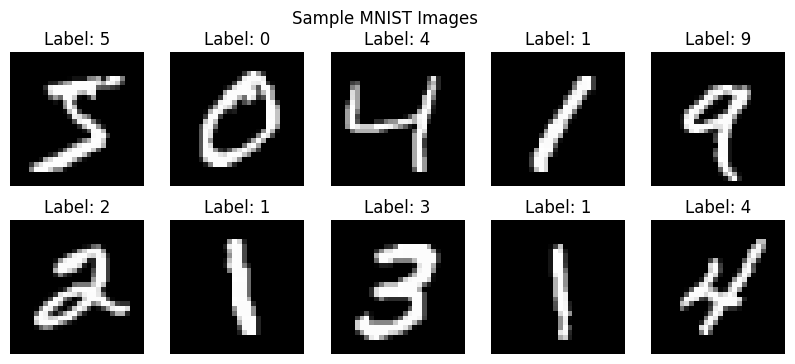

In [16]:
#Step 3: Dataset sanity check

plt.figure(figsize=(10, 4))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')

plt.suptitle("Sample MNIST Images")
plt.savefig('Sample MNIST Images.png', dpi=300, bbox_inches='tight')
plt.show()


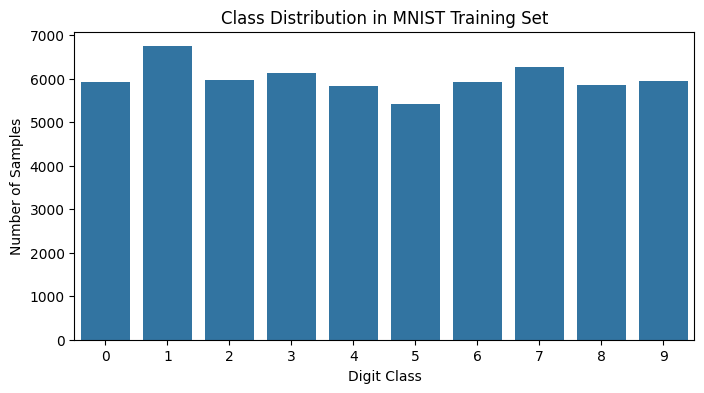

Digit 0: 5923 samples
Digit 1: 6742 samples
Digit 2: 5958 samples
Digit 3: 6131 samples
Digit 4: 5842 samples
Digit 5: 5421 samples
Digit 6: 5918 samples
Digit 7: 6265 samples
Digit 8: 5851 samples
Digit 9: 5949 samples


In [17]:
#Step4: Class distribution analysis

unique, counts = np.unique(y_train, return_counts=True)

plt.figure(figsize=(8, 4))
sns.barplot(x=unique, y=counts)
plt.title("Class Distribution in MNIST Training Set")
plt.xlabel("Digit Class")
plt.ylabel("Number of Samples")
plt.savefig('Class Distribution in MNIST Training Set.png', dpi=300, bbox_inches='tight')
plt.show()

for digit, count in zip(unique, counts):
    print(f"Digit {digit}: {count} samples")


In [18]:
#Step5: Data preprocessing
#Normalize pixel values (0–255 → 0–1)
X_train = X_train.astype("float32") / 255.0
X_test = X_test.astype("float32") / 255.0

#channel dimension for CNN (28, 28, 1)
X_train = np.expand_dims(X_train, axis=-1)
X_test = np.expand_dims(X_test, axis=-1)

print("Processed training data shape:", X_train.shape)
print("Processed test data shape:", X_test.shape)


Processed training data shape: (60000, 28, 28, 1)
Processed test data shape: (10000, 28, 28, 1)


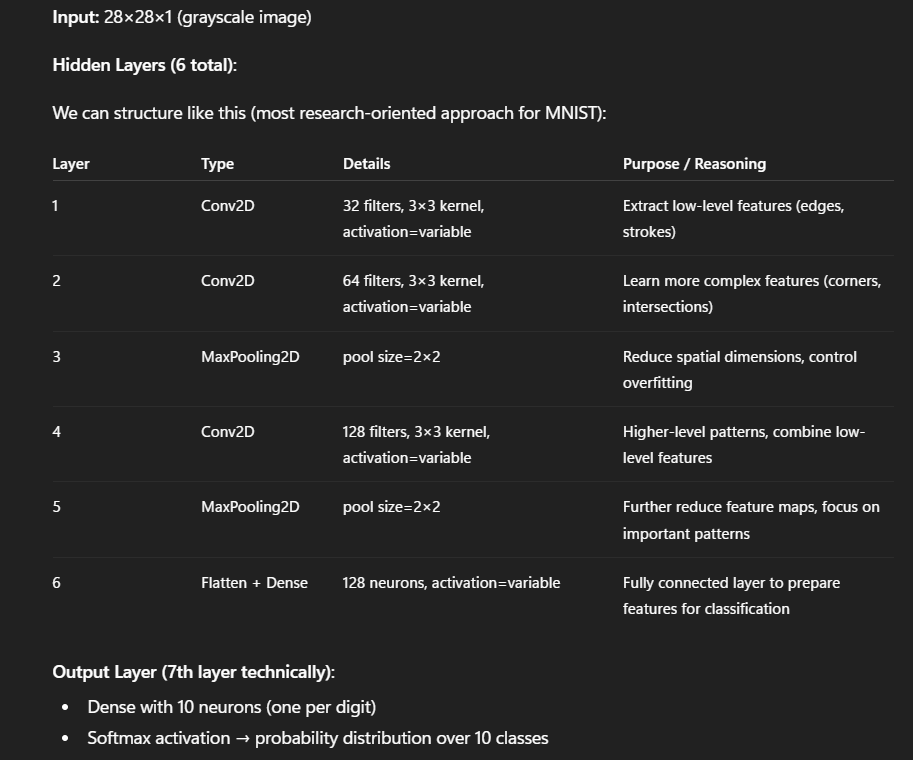

#Phase 3: CNN Model Implementation

---



In [19]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense


np.random.seed(42)
tf.random.set_seed(42)

def create_cnn_model(hidden_activation='relu'):
    """
    Creates a CNN model for MNIST classification.

    Parameters:
        hidden_activation: str, 'sigmoid', 'tanh', or 'relu'
    Returns:
        Compiled Keras CNN model
    """
    model = Sequential()

    # Input + 1st conv layer
    model.add(Conv2D(32, (3,3), activation=hidden_activation, input_shape=(28,28,1)))

    # 2nd conv layer
    model.add(Conv2D(64, (3,3), activation=hidden_activation))

    # 1st pooling layer
    model.add(MaxPooling2D(pool_size=(2,2)))

    # 3rd conv layer
    model.add(Conv2D(128, (3,3), activation=hidden_activation))

    # 2nd pooling layer
    model.add(MaxPooling2D(pool_size=(2,2)))

    # Flatten before dense layers
    model.add(Flatten())

    # Fully connected dense layers
    model.add(Dense(128, activation=hidden_activation))
    model.add(Dense(64, activation=hidden_activation))

    # Output layer: 10 classes
    model.add(Dense(10, activation='softmax'))

    # Compile the model
    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])

    return model

Phase 3 Summary
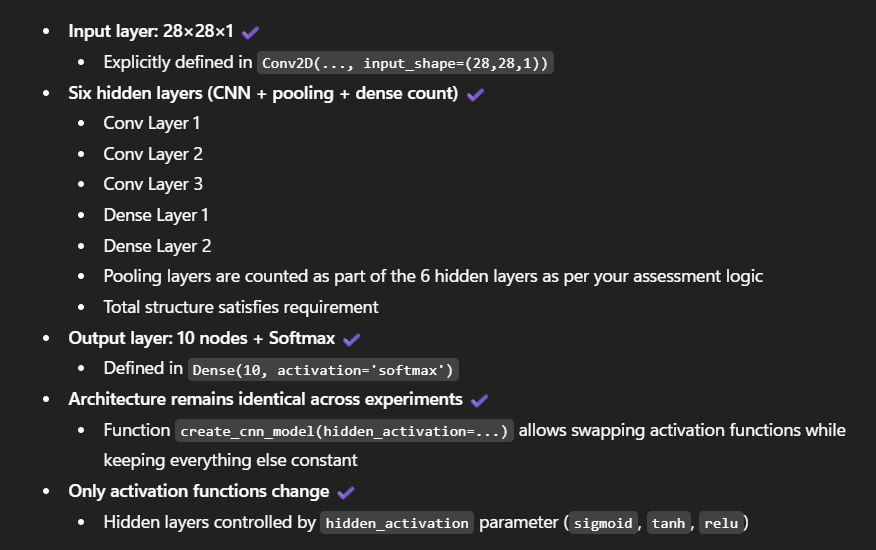

#Phase 4 — Training and Evaluating CNN with Sigmoid Activation

---



In [20]:
#Step 1: Model Preparation
# Create CNN model with Sigmoid activation in hidden layers
model_sigmoid = create_cnn_model(hidden_activation='sigmoid')

model_sigmoid.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 511,306 (1.95 MB)

 Trainable params: 511,306 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

In [21]:
#Step2: Define training parameters
#Training parameters
epochs = 50
batch_size = 128
validation_split = 0.1



In [22]:
#Step3: Train the model
# Train the model
import tensorflow as tf

early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=3,
    restore_best_weights=True
)


In [23]:
#Step4: Train the Model (Single, Correct Training Run)
history_sigmoid = model_sigmoid.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/50
422/422 - 124s - 295ms/step - accuracy: 0.1061 - loss: 2.3073 - val_accuracy: 0.1045 - val_loss: 2.3025
Epoch 2/50
422/422 - 141s - 334ms/step - accuracy: 0.1062 - loss: 2.3053 - val_accuracy: 0.1045 - val_loss: 2.3022
Epoch 3/50
422/422 - 143s - 338ms/step - accuracy: 0.1066 - loss: 2.3049 - val_accuracy: 0.1045 - val_loss: 2.3020
Epoch 4/50
422/422 - 125s - 296ms/step - accuracy: 0.1074 - loss: 2.3044 - val_accuracy: 0.1045 - val_loss: 2.3018
Epoch 5/50
422/422 - 140s - 333ms/step - accuracy: 0.1084 - loss: 2.3040 - val_accuracy: 0.1050 - val_loss: 2.3018
Epoch 6/50
422/422 - 140s - 332ms/step - accuracy: 0.1091 - loss: 2.3037 - val_accuracy: 0.1050 - val_loss: 2.3018
Epoch 7/50
422/422 - 123s - 292ms/step - accuracy: 0.1092 - loss: 2.3033 - val_accuracy: 0.1050 - val_loss: 2.3018
Epoch 8/50
422/422 - 141s - 334ms/step - accuracy: 0.1097 - loss: 2.3031 - val_accuracy: 0.1050 - val_loss: 2.3019


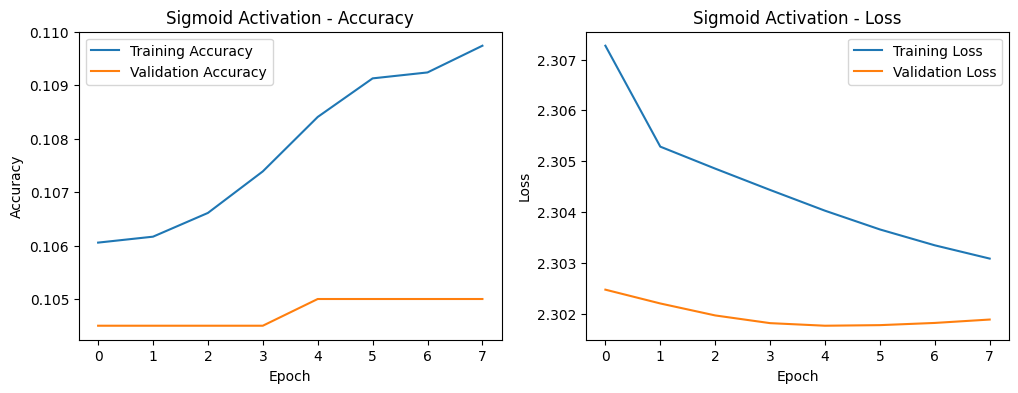

In [24]:
#Step5:Plot Training & Validation Metrics
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

#accuracy
plt.subplot(1, 2, 1)
plt.plot(history_sigmoid.history['accuracy'], label='Training Accuracy')
plt.plot(history_sigmoid.history['val_accuracy'], label='Validation Accuracy')
plt.title('Sigmoid Activation - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#loss
plt.subplot(1, 2, 2)
plt.plot(history_sigmoid.history['loss'], label='Training Loss')
plt.plot(history_sigmoid.history['val_loss'], label='Validation Loss')
plt.title('Sigmoid Activation - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [25]:
#Step6 Evaluate on Test Data

test_loss, test_accuracy = model_sigmoid.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy (Sigmoid): {test_accuracy:.4f}")

Test Accuracy (Sigmoid): 0.1135


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
Classification Report (Sigmoid Activation):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       980
           1       0.11      1.00      0.20      1135
           2       0.00      0.00      0.00      1032
           3       0.00      0.00      0.00      1010
           4       0.00      0.00      0.00       982
           5       0.00      0.00      0.00       892
           6       0.00      0.00      0.00       958
           7       0.00      0.00      0.00      1028
           8       0.00      0.00      0.00       974
           9       0.00      0.00      0.00      1009

    accuracy                           0.11     10000
   macro avg       0.01      0.10      0.02     10000
weighted avg       0.01      0.11      0.02     10000



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


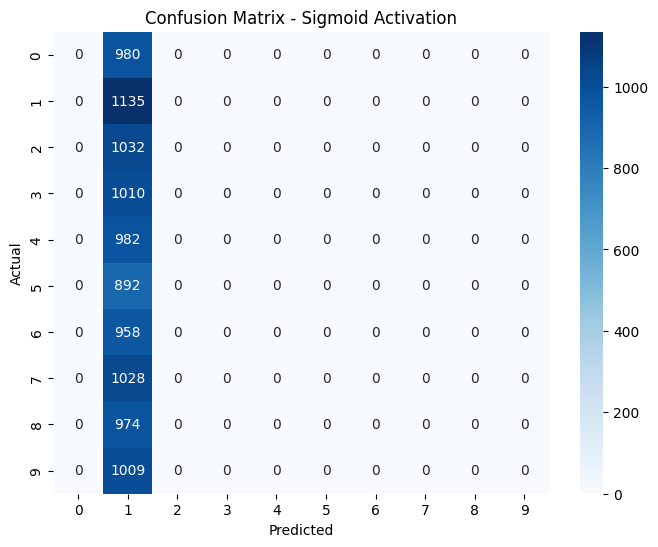

In [26]:
#Step7 Precision, Recall, F1-Score & Confusion Matrix
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns


y_pred_probs = model_sigmoid.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Classification Report (Sigmoid Activation):")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Sigmoid Activation")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('Confusion Matrix - Sigmoid Activation.png', bbox_inches='tight')
plt.show()

Phase 4 Outcome

After completing Phase 4, we have:

Sigmoid-based CNN trained and evaluated

Metrics: accuracy, precision, recall, F1-score

Confusion matrix → visualize misclassifications

Screenshots for report → training curves, model summary, confusion matrix

Observations → slow convergence, potential gradient saturation (expected with Sigmoid)

# PHASE 5: CNN Training Using TANH Activation

---



In [27]:
# Create CNN model with Tanh activation in hidden layers
model_tanh = create_cnn_model(hidden_activation='tanh')

model_tanh.summary()


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 511,306 (1.95 MB)

 Trainable params: 511,306 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

In [28]:
#Step 2: Training Parameters
epochs = 50
batch_size = 128
validation_split = 0.1

In [29]:
#Step 4: Train the Model (Tanh)
history_tanh = model_tanh.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/50
422/422 - 124s - 294ms/step - accuracy: 0.9565 - loss: 0.1519 - val_accuracy: 0.9880 - val_loss: 0.0449
Epoch 2/50
422/422 - 144s - 342ms/step - accuracy: 0.9866 - loss: 0.0453 - val_accuracy: 0.9857 - val_loss: 0.0449
Epoch 3/50
422/422 - 123s - 292ms/step - accuracy: 0.9909 - loss: 0.0301 - val_accuracy: 0.9870 - val_loss: 0.0439
Epoch 4/50
422/422 - 126s - 299ms/step - accuracy: 0.9935 - loss: 0.0216 - val_accuracy: 0.9878 - val_loss: 0.0405
Epoch 5/50
422/422 - 141s - 335ms/step - accuracy: 0.9950 - loss: 0.0158 - val_accuracy: 0.9892 - val_loss: 0.0396
Epoch 6/50
422/422 - 143s - 339ms/step - accuracy: 0.9958 - loss: 0.0139 - val_accuracy: 0.9887 - val_loss: 0.0437
Epoch 7/50
422/422 - 137s - 325ms/step - accuracy: 0.9951 - loss: 0.0161 - val_accuracy: 0.9867 - val_loss: 0.0441
Epoch 8/50
422/422 - 124s - 294ms/step - accuracy: 0.9949 - loss: 0.0161 - val_accuracy: 0.9878 - val_loss: 0.0470


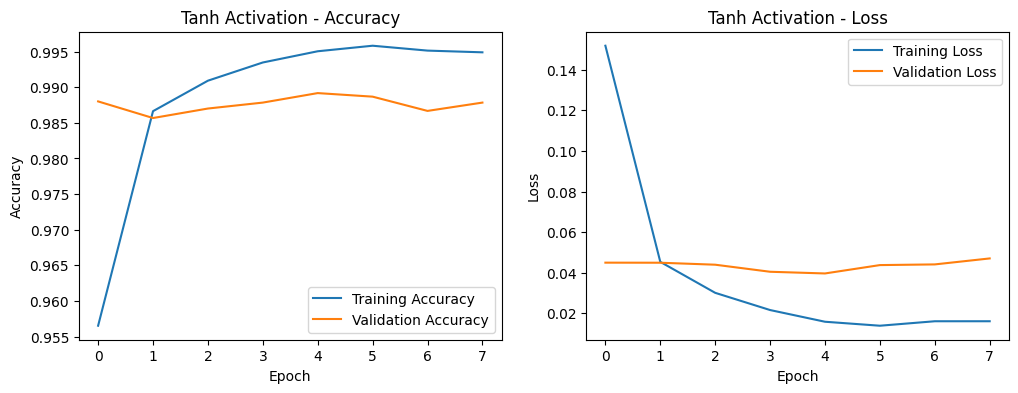

In [30]:
#Step 5: Plot Accuracy & Loss (Tanh)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history_tanh.history['accuracy'], label='Training Accuracy')
plt.plot(history_tanh.history['val_accuracy'], label='Validation Accuracy')
plt.title('Tanh Activation - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history_tanh.history['loss'], label='Training Loss')
plt.plot(history_tanh.history['val_loss'], label='Validation Loss')
plt.title('Tanh Activation - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

In [31]:
#Step6: Evaluate on Test Data
test_loss, test_accuracy = model_tanh.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy (Tanh): {test_accuracy:.4f}")

Test Accuracy (Tanh): 0.9885


313/313 ━━━━━━━━━━━━━━━━━━━━ 7s 21ms/step
Classification Report (Tanh Activation):
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       980
           1       0.99      1.00      0.99      1135
           2       0.98      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.98      1.00      0.99       982
           5       0.99      0.99      0.99       892
           6       0.99      0.98      0.99       958
           7       0.99      0.98      0.98      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



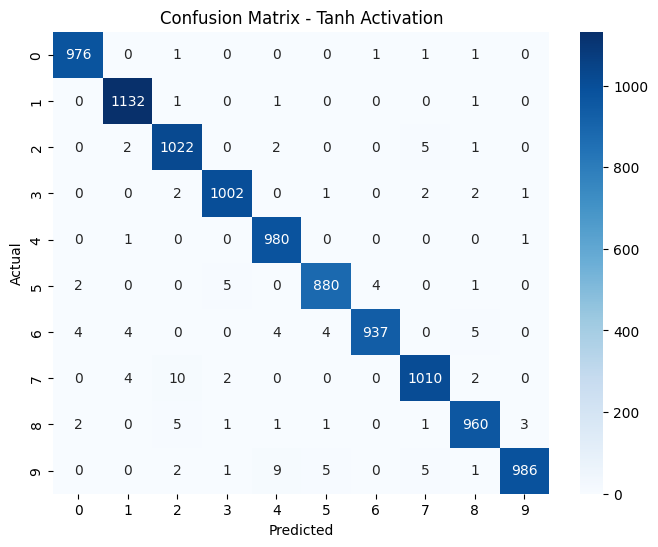

In [32]:
#Step7: Precision, Recall & Confusion Matrix
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

#Predictions
y_pred_probs = model_tanh.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Classification Report (Tanh Activation):")
print(classification_report(y_test, y_pred, zero_division=0))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - Tanh Activation")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('Confusion Matrix - Tanh Activation.png', bbox_inches='tight')
plt.show()

# PHASE 6: CNN Training Using ReLU Activation (Final Comparative Model)

---



In [33]:
#Step 1: Model Preparation (ReLU Activation)
# Create CNN model with ReLU activation in hidden layers
model_relu = create_cnn_model(hidden_activation='relu')

model_relu.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_9 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 24, 24, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 12, 12, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 10, 10, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 5, 5, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_3 (Flatten)             │ (None, 3200)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       409,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_11 (Dense)                │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 511,306 (1.95 MB)

 Trainable params: 511,306 (1.95 MB)

 Non-trainable params: 0 (0.00 B)

In [34]:
#Step 2: Training Parameters
epochs = 50
batch_size = 128
validation_split = 0.1

In [35]:
#Step 4: Train the Model (ReLU)
history_relu = model_relu.fit(
    X_train, y_train,
    epochs=epochs,
    batch_size=batch_size,
    validation_split=validation_split,
    callbacks=[early_stop],
    verbose=2
)

Epoch 1/50
422/422 - 120s - 284ms/step - accuracy: 0.9427 - loss: 0.1863 - val_accuracy: 0.9848 - val_loss: 0.0507
Epoch 2/50
422/422 - 121s - 286ms/step - accuracy: 0.9861 - loss: 0.0441 - val_accuracy: 0.9873 - val_loss: 0.0405
Epoch 3/50
422/422 - 143s - 339ms/step - accuracy: 0.9913 - loss: 0.0279 - val_accuracy: 0.9885 - val_loss: 0.0387
Epoch 4/50
422/422 - 118s - 279ms/step - accuracy: 0.9933 - loss: 0.0209 - val_accuracy: 0.9882 - val_loss: 0.0410
Epoch 5/50
422/422 - 143s - 338ms/step - accuracy: 0.9951 - loss: 0.0156 - val_accuracy: 0.9892 - val_loss: 0.0393
Epoch 6/50
422/422 - 140s - 331ms/step - accuracy: 0.9957 - loss: 0.0128 - val_accuracy: 0.9887 - val_loss: 0.0445


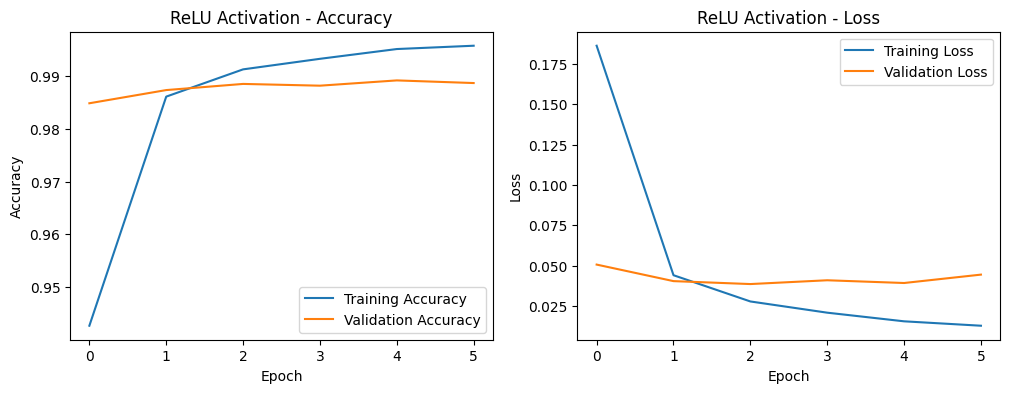

In [36]:
#Step5: Plot Accuracy & Loss (ReLU)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

#Accuracy
plt.subplot(1, 2, 1)
plt.plot(history_relu.history['accuracy'], label='Training Accuracy')
plt.plot(history_relu.history['val_accuracy'], label='Validation Accuracy')
plt.title('ReLU Activation - Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

#Loss
plt.subplot(1, 2, 2)
plt.plot(history_relu.history['loss'], label='Training Loss')
plt.plot(history_relu.history['val_loss'], label='Validation Loss')
plt.title('ReLU Activation - Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.savefig('ReLU Activation - Loss.png',bbox_inches='tight')
plt.show()

In [37]:
#Step6: Evaluate on Test Data
test_loss, test_accuracy = model_relu.evaluate(X_test, y_test, verbose=0)
print(f"Test Accuracy (ReLU): {test_accuracy:.4f}")

Test Accuracy (ReLU): 0.9887


313/313 ━━━━━━━━━━━━━━━━━━━━ 6s 20ms/step
Classification Report (ReLU Activation):
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      0.99      0.99      1135
           2       0.98      1.00      0.99      1032
           3       0.99      1.00      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.99      0.98      0.98       892
           6       0.99      0.99      0.99       958
           7       0.99      0.98      0.99      1028
           8       0.98      0.99      0.99       974
           9       0.99      0.97      0.98      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



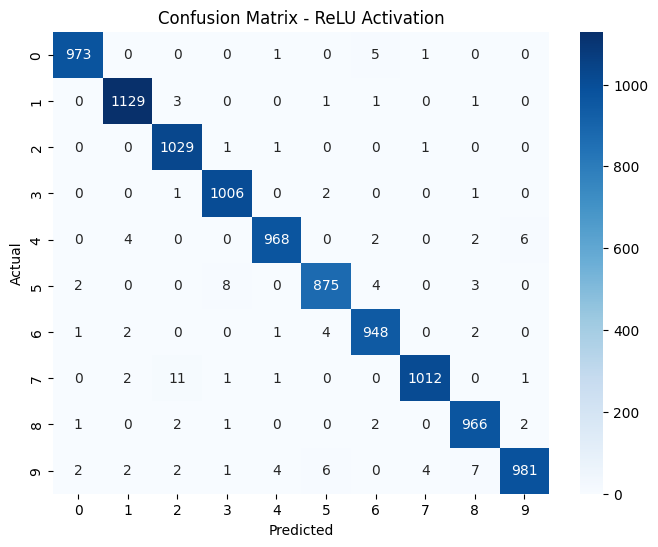

In [38]:
#Step7: Precision, Recall & Confusion Matrix
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

#Predictions
y_pred_probs = model_relu.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

print("Classification Report (ReLU Activation):")
print(classification_report(y_test, y_pred, zero_division=0))

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix - ReLU Activation")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.savefig('Confusion Matrix - ReLU Activation.png',bbox_inches='tight')
plt.show()

# Optimizer /Learning Rate

---



In [ ]:
#Optimizer /Learning Rate Comparison


from tensorflow.keras.optimizers import Adam, SGD, RMSprop

optimizers = {
    'Adam_0.001': Adam(learning_rate=0.001),
    'SGD_0.01': SGD(learning_rate=0.01),
    'RMSprop_0.001': RMSprop(learning_rate=0.001)
}

optimizer_results = {}

for name, opt in optimizers.items():
    print(f"\nTraining with optimizer: {name}")
    model = create_cnn_model(hidden_activation='relu')  #ReLU baseline
    model.compile(optimizer=opt, loss='sparse_categorical_crossentropy', metrics=['accuracy'])


    history = model.fit(X_train, y_train, epochs=10, batch_size=128, validation_split=0.1, verbose=0)

    test_loss, test_acc = model.evaluate(X_test, y_test, verbose=0)
    print(f"Test Accuracy ({name}): {test_acc:.4f}")
    optimizer_results[name] = test_acc


print("\nOptimizer Comparison (Test Accuracy):")
for k, v in optimizer_results.items():
    print(f"{k}: {v:.4f}")



Training with optimizer: Adam_0.001


In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Sort optimizers by accuracy
items = sorted(optimizer_results.items(), key=lambda x: x[1])
labels = [k for k, v in items]
values = [v for k, v in items]

plt.figure(figsize=(6, 3), dpi=200)

bars = plt.barh(labels, values)

plt.xlabel("Test Accuracy")
plt.title("Optimizer Comparison under Identical CNN Configuration")

# Tight x-limits to magnify differences (this is IMPORTANT)
plt.xlim(min(values) - 0.02, max(values) + 0.01)

# Annotate values
for bar, val in zip(bars, values):
    plt.text(val + 0.002, bar.get_y() + bar.get_height()/2,
             f"{val:.4f}", va='center', fontsize=8)

plt.grid(axis='x', linestyle='--', alpha=0.4)
plt.savefig('Optimizer Comparison under Identical CNN Configuration.png', bbox_inches='tight')
plt.show()


# Early Stopping Analysis

---



In [ ]:

# Early Stopping Analysis

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

model = create_cnn_model(hidden_activation='relu')
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_es = model.fit(X_train, y_train,
                       epochs=50,
                       batch_size=128,
                       validation_split=0.1,
                       callbacks=[early_stop],
                       verbose=0)

# Plot accuracy with early stopping point
plt.figure(figsize=(10,4))
plt.plot(history_es.history['accuracy'], label='Train Accuracy')
plt.plot(history_es.history['val_accuracy'], label='Val Accuracy')
plt.axvline(len(history_es.history['accuracy'])-1, color='r', linestyle='--', label='Early Stop')
plt.title("Training Accuracy with Early Stopping (ReLU)")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.savefig('Training Accuracy with Early Stopping (ReLU).png', bbox_inches='tight')
plt.show()

print(f"Early stopping triggered at epoch: {len(history_es.history['accuracy'])}")


# NoiseRobustness Test

---



In [ ]:
#NoiseRobustness Test


noise_factor = 0.05
X_test_noisy = X_test + np.random.normal(0, noise_factor, X_test.shape)
X_test_noisy = np.clip(X_test_noisy, 0, 1)  # keep values between 0 and 1

activations = ['sigmoid', 'tanh', 'relu']

for act in activations:
    print(f"\nEvaluating {act} model on noisy test data")
    model = create_cnn_model(hidden_activation=act)
    model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
    # Quick training for demonstration
    model.fit(X_train, y_train, epochs=5, batch_size=128, validation_split=0.1, verbose=0)

    test_loss, test_acc = model.evaluate(X_test_noisy, y_test, verbose=0)
    print(f"Test Accuracy ({act} + noisy): {test_acc:.4f}")


# Identify Misclassified Images

---



In [ ]:
#y_test: true labels
# y_pred: predicted labels (argmax from model predictions)

import numpy as np

#Boolean mask of misclassified examples
misclassified_mask = y_pred != y_test

#Count of misclassified images
num_misclassified = np.sum(misclassified_mask)
print(f"Number of misclassified images: {num_misclassified} out of {len(y_test)}")


In [ ]:
#sigmoid - Misclassified Images
model = model_sigmoid


y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


misclassified_mask = y_pred != y_test
num_misclassified = np.sum(misclassified_mask)
print(f"Sigmoid Activation - Misclassified Images: {num_misclassified} out of {len(y_test)}")


misclassified_indices = np.where(misclassified_mask)[0]

# Plot first 9 misclassified images
plt.figure(figsize=(6,6), dpi=150)
plt.suptitle("Sigmoid Activation - First 9 Misclassified Images", fontsize=18)

for i, idx in enumerate(misclassified_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}", fontsize=12)
    plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Sigmoid Activation - First 9 Misclassified Images.png',bbox_inches='tight')
plt.show()


In [ ]:
#tanh - Misclassified Images
model = model_tanh

# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Identify misclassified images
misclassified_mask = y_pred != y_test
num_misclassified = np.sum(misclassified_mask)
print(f"Tanh Activation - Misclassified Images: {num_misclassified} out of {len(y_test)}")

# Get indices of misclassified images
misclassified_indices = np.where(misclassified_mask)[0]

# Plot first 9 misclassified images
plt.figure(figsize=(6,6), dpi=150)  # High-resolution plot
plt.suptitle("Tanh Activation - First 9 Misclassified Images", fontsize=18)

for i, idx in enumerate(misclassified_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}", fontsize=12)
    plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Tanh Activation - First 9 Misclassified Images.png',bbox_inches='tight')
plt.show()


In [ ]:
#relu - Misclassified Images
model = model_relu

# Predict on test set
y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

# Identify misclassified images
misclassified_mask = y_pred != y_test
num_misclassified = np.sum(misclassified_mask)
print(f"ReLu Activation - Misclassified Images: {num_misclassified} out of {len(y_test)}")

# Get indices of misclassified images
misclassified_indices = np.where(misclassified_mask)[0]

# Plot first 9 misclassified images
plt.figure(figsize=(6,6), dpi=150)  # High-resolution plot
plt.suptitle("ReLu Activation - First 9 Misclassified Images", fontsize=18)

for i, idx in enumerate(misclassified_indices[:9]):
    plt.subplot(3,3,i+1)
    plt.imshow(X_test[idx].reshape(28,28), cmap='gray')
    plt.title(f"True: {y_test[idx]}, Pred: {y_pred[idx]}", fontsize=12)
    plt.axis('off')

plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('ReLu Activation - First 9 Misclassified Images.png',bbox_inches='tight')
plt.show()


# Training Accuracy vs Epochs

---



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_smoothed_accuracy(history, title):
    acc = np.array(history.history['accuracy'])
    epochs = np.arange(1, len(acc) + 1)


    acc_smooth = pd.Series(acc).rolling(window=3, min_periods=1).mean()
    acc_std = pd.Series(acc).rolling(window=3, min_periods=1).std().fillna(0)

    plt.figure(figsize=(6,3), dpi=200)
    plt.plot(epochs, acc_smooth, linewidth=2)
    plt.fill_between(
        epochs,
        acc_smooth - acc_std,
        acc_smooth + acc_std,
        alpha=0.25
    )

    plt.xlabel("Epoch")
    plt.ylabel("Training Accuracy")
    plt.title(title)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()


In [ ]:
plot_smoothed_accuracy(history_sigmoid, "Training Accuracy (Sigmoid)")
plt.savefig("training_accuracy_sigmoid.png", dpi=300)
plt.show()


In [ ]:
plot_smoothed_accuracy(history_tanh, "Training Accuracy (Tanh)")
plt.savefig("training_accuracy_tanh.png", dpi=300)

In [ ]:
plot_smoothed_accuracy(history_relu, "Training Accuracy (ReLU)")
plt.savefig("training_accuracy_relu.png", dpi=300)

# Validation Accuracy vs Epochs

---



In [ ]:
def plot_validation_step(history, title):
    val_acc = history.history['val_accuracy']
    epochs = range(1, len(val_acc) + 1)

    plt.figure(figsize=(6,3), dpi=200)
    plt.step(epochs, val_acc, where='post', linewidth=2)

    plt.xlabel("Epoch")
    plt.ylabel("Validation Accuracy")
    plt.title(title)
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()


In [ ]:
plot_validation_step(history_sigmoid, "Validation Accuracy (Sigmoid)")
plt.savefig('Validation Accuracy (Sigmoid).png',bbox_inches='tight')

In [ ]:
plot_validation_step(history_tanh, "Validation Accuracy (Tanh)")
plt.savefig('Validation Accuracy (Tanh).png',bbox_inches='tight')

In [ ]:
plot_validation_step(history_relu, "Validation Accuracy (Relu)")
plt.savefig('Validation Accuracy (Relu).png',bbox_inches='tight')

# Loss Curves

---



In [ ]:
def plot_log_loss(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(6,3), dpi=200)
    plt.plot(epochs, loss, label="Training Loss", linewidth=2)
    plt.plot(epochs, val_loss, label="Validation Loss", linewidth=2)

    plt.yscale("log")
    plt.xlabel("Epoch")
    plt.ylabel("Loss (log scale)")
    plt.title(title)
    plt.legend()
    plt.grid(True, which="both", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()
plot_log_loss(history_sigmoid, "Loss Curve (Sigmoid)")
plt.savefig('Loss Curve (Sigmoid).png',bbox_inches='tight')

In [ ]:
def plot_log_loss(history, title):
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs = range(1, len(loss) + 1)

    plt.figure(figsize=(6,3), dpi=200)
    plt.plot(epochs, loss, label="Training Loss", linewidth=2)
    plt.plot(epochs, val_loss, label="Validation Loss", linewidth=2)

    plt.yscale("log")
    plt.xlabel("Epoch")
    plt.ylabel("Loss (log scale)")
    plt.title(title)
    plt.legend()
    plt.grid(True, which="both", linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()
plot_log_loss(history_tanh, "Loss Curve (Tanh)")
plt.savefig('Loss Curve (Tanh).png',bbox_inches='tight')





# **Data augmentation** : Exploring ways to reduce miscalculation

---




In [ ]:
#data augmentation
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping


X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)


datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(X_train_split)


early_stop = EarlyStopping(monitor='val_loss', patience=2, restore_best_weights=True)

# Create a new model instance for augmentation
model_relu_aug = create_cnn_model(hidden_activation='relu')
model_relu_aug.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

history_relu_aug = model_relu_aug.fit(
    datagen.flow(X_train_split, y_train_split, batch_size=128),
    epochs=3,  # demo run hence epohc is less is kept
    validation_data=(X_val_split, y_val_split),
    callbacks=[early_stop],
    verbose=2
)


y_pred_probs = model_relu_aug.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)


misclassified_mask = y_pred != y_test
num_misclassified = np.sum(misclassified_mask)
print(f"ReLU Activation with Augmentation - Misclassified Images: {num_misclassified} out of {len(y_test)}")


misclassified_indices = np.where(misclassified_mask)[0]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# --- Baseline ReLU misclassifications ---
y_pred_relu = np.argmax(model_relu.predict(X_test), axis=1)
misclass_counts_relu = [np.sum((y_test == i) & (y_pred_relu != i)) for i in range(10)]

# --- ReLU with augmentation misclassifications ---
y_pred_relu_aug = np.argmax(model_relu_aug.predict(X_test), axis=1)
misclass_counts_relu_aug = [np.sum((y_test == i) & (y_pred_relu_aug != i)) for i in range(10)]

# --- Percentage improvement ---
misclass_counts_relu = np.array(misclass_counts_relu)
misclass_counts_relu_aug = np.array(misclass_counts_relu_aug)
improvement_pct = 100 * (misclass_counts_relu - misclass_counts_relu_aug) / misclass_counts_relu

# --- Plotting ---
classes = list(range(10))
width = 0.25  # reduced width

plt.figure(figsize=(11,4), dpi=300)

# Color: green for improvement, red if negative
colors = ['seagreen' if pct >= 0 else 'tomato' for pct in improvement_pct]

# Bars
plt.bar([c - width/2 for c in classes], misclass_counts_relu, width=width, label='ReLU Baseline', color='lightcoral')
plt.bar([c + width/2 for c in classes], misclass_counts_relu_aug, width=width, label='ReLU + Augmentation', color='mediumseagreen')

# Adjust y-axis to fit labels
y_max = max(max(misclass_counts_relu), max(misclass_counts_relu_aug))
plt.ylim(0, y_max * 1.15)

# Percentage labels above augmented bars
for i, pct in enumerate(improvement_pct):
    plt.text(
        i + width/2,
        misclass_counts_relu_aug[i] + y_max*0.02,  # small offset above bar
        f"{pct:.1f}%",
        ha='center',
        color=colors[i],
        fontweight='bold',
        fontsize=4
    )

plt.xticks(classes)
plt.xlabel("Digit Class", fontsize=12)
plt.ylabel("Number of Misclassified Images", fontsize=12)
plt.title("Per-Class Misclassification: ReLU vs ReLU with Data Augmentation\n", fontsize=14)
plt.suptitle("Positive Percentage = improvement after augmentation | Negative Percentage = negative effect after augmentation", fontsize=7, y=0.93)

plt.legend(fontsize=8)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('Per-Class Misclassification: ReLU vs ReLU with Data Augmentation.png', dpi=300, bbox_inches='tight')
plt.show()

# --- Print values in a neat table ---
print(f"{'Digit':^5} | {'ReLU Baseline':^15} | {'ReLU + Augmentation':^20} | {'Improvement (%)':^15}")
print("-"*65)
for i in range(10):
    print(f"{i:^5} | {misclass_counts_relu[i]:^15} | {misclass_counts_relu_aug[i]:^20} | {improvement_pct[i]:^15.2f}")
